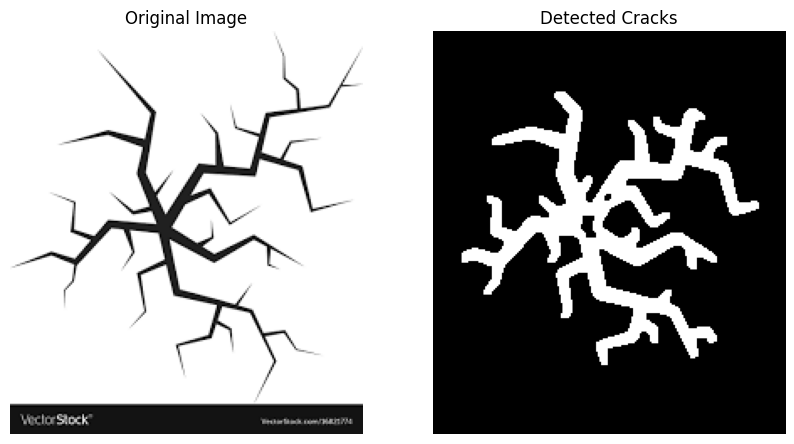

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('c1.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to smooth the image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Compute gradients using Sobel operators
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_magnitude = np.uint8(gradient_magnitude)

_, cracks = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

h, w = cracks.shape
center = (w // 2, h // 2)
radius = min(center[0], center[1]) - 15 
mask = np.zeros_like(cracks)
cv2.circle(mask, center, radius, 255, thickness=-1)

cracks_masked = cv2.bitwise_and(cracks, mask)

# Additional morphological operations to refine cracks
kernel = np.ones((3, 3), np.uint8)
cracks_refined = cv2.morphologyEx(cracks_masked, cv2.MORPH_CLOSE, kernel)
cracks_refined = cv2.morphologyEx(cracks_refined, cv2.MORPH_OPEN, kernel)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
img_color = img
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Detected Cracks")
plt.imshow(cracks_refined, cmap='gray')
plt.axis('off')

plt.show()

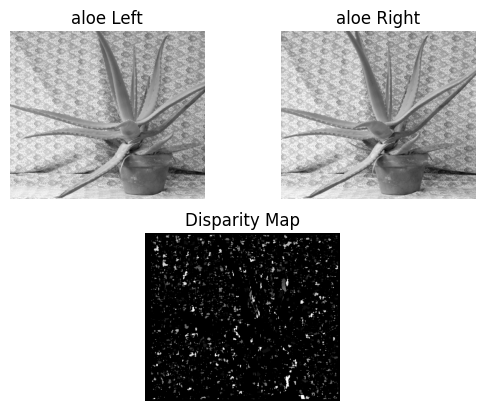

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read two input images
imgL = cv2.imread('aloeL.jpg',0)
imgR = cv2.imread('aloeR.jpg',0)

# Initiate and StereoBM object
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

# compute the disparity map
disparity = stereo.compute(imgL,imgR)
disparity1 = stereo.compute(imgR,imgL)

plt.subplot(2,2,1)
plt.title("aloe Left")
plt.imshow(imgL, cmap = 'gray')
plt.axis("off")

plt.subplot(2,2,2)
plt.title("aloe Right")
plt.imshow(imgR, cmap = 'gray')
plt.axis("off")

plt.subplot(2,2,(3,4))
plt.title("Disparity Map")
plt.imshow(disparity,'gray')
plt.axis("off")

plt.show()